In [36]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from IPython.display import display

In [37]:
#Load the dataSet
data = pd.read_csv("diabetes.csv")

#Summary of the records
print("This dataset has {} samples with {} features each.".format(data.shape[0], data.shape[1]))

#Display first 20 Record
print("\n Display the first 2 record")
#Default of head function 5 record
display(data.head(2))

#Describe the data
print("Statistical description of dataset \n")
display(data.describe())

#Summary about dataset
data.info()

This dataset has 768 samples with 9 features each.

 Display the first 2 record


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


Statistical description of dataset 



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB



Total number of individuals: 768
Individuals with diabetes: 268
Individuals without diabetes: 500
Percentage of individuals with diabetes:34.90%



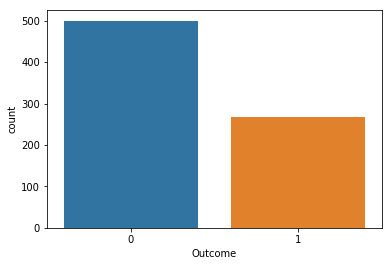

In [54]:
# Evaluate the balance(number of instances per lebel) of the data set
n_records = data.shape[0]
n_with_diabetes = data[data["Outcome"] == 1].shape[0]
n_without_diabetes = data[data["Outcome"] == 0].shape[0]
greater_percent = (n_with_diabetes*100) / float(n_records)

print("\nTotal number of individuals: {}".format(n_records))
print("Individuals with diabetes: {}".format(n_with_diabetes))
print ("Individuals without diabetes: {}".format(n_without_diabetes))
print("Percentage of individuals with diabetes:{:.2f}%\n".format(greater_percent))

# Count of instances per Target/Label variable 
sns.countplot(data['Outcome'],label="Count")

y_pos:[0 1 2 3 4 5 6 7]
count_of_zero_list:[111, 5, 35, 227, 374, 11, 0, 0]


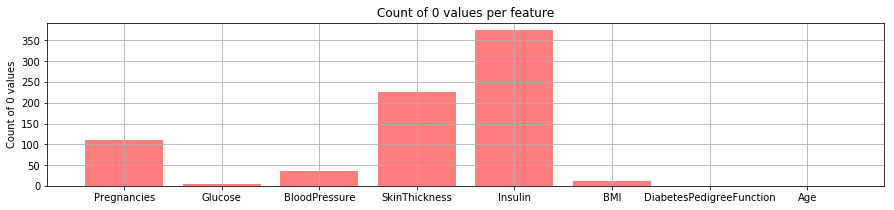

In [85]:
# Missing Or Unwanted 0 values 
featurelist = []
count_of_zero_list = []

for col in data:
    cnt = 0
    for i in data[col]:
        if i==0:
            cnt = cnt + 1
    if col!='Outcome':
        #print (col, "-", cnt)
        featurelist.append(col)
        count_of_zero_list.append(cnt)
#featurelist => list type
objects = tuple(featurelist)
#objects => tuple type
#len(featurelist) = 8
y_pos = np.arange(len(featurelist))
print("y_pos:{}".format(y_pos))
print("count_of_zero_list:{}".format(count_of_zero_list))
 
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 15 and height to 3
fig_size[0] = 15
fig_size[1] = 3

plt.bar(y_pos, count_of_zero_list, align='center', color='r', alpha=0.5)
plt.xticks(y_pos, objects)

plt.ylabel('Count of 0 values')
plt.title('Count of 0 values per feature')
plt.grid(True)

plt.show()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

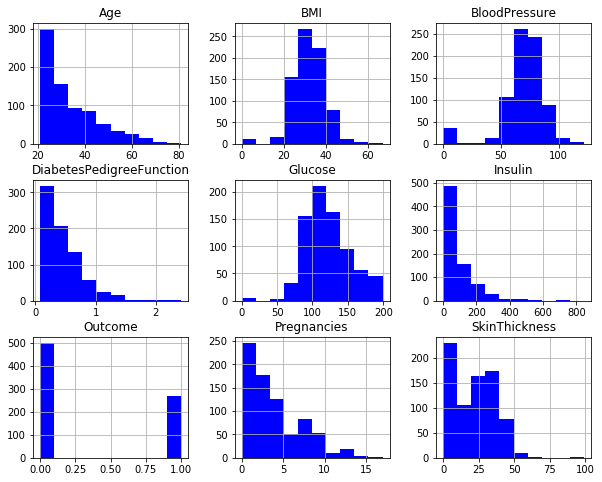

In [96]:
#Feature distribution viz using histogram and boxplots
data.hist(figsize=(10,8),color='b')
pd.DataFrame.skew(data, axis=0)

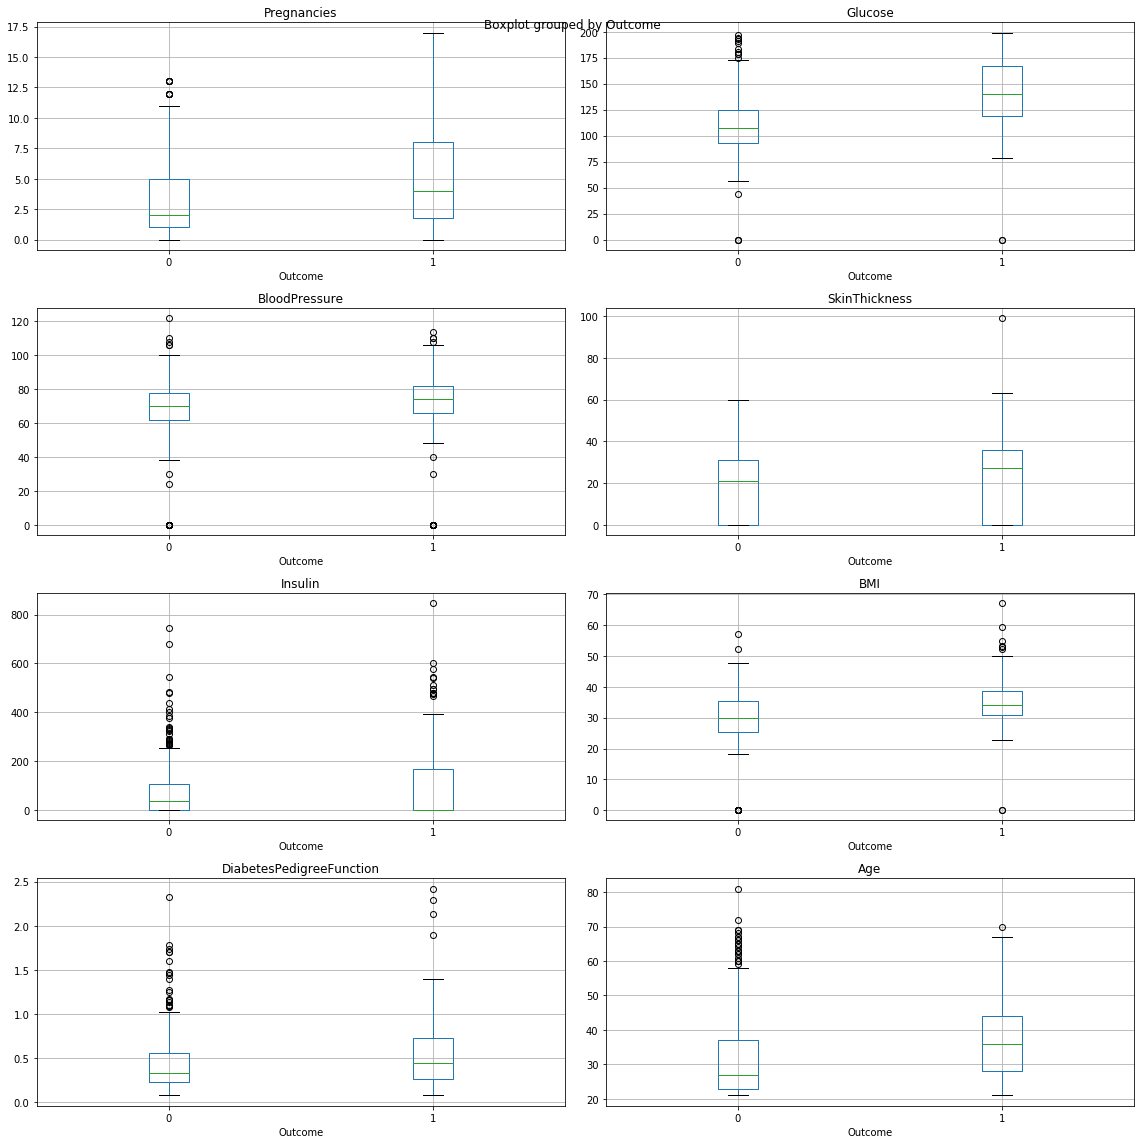

In [99]:
# Comparing distributions, the centre, spread and overall range  w.r.t two binary outcome(0/1) 
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16,16))

data.boxplot(column='Pregnancies', by='Outcome',ax=axes[0,0])
data.boxplot(column='Glucose', by='Outcome', ax=axes[0,1])
data.boxplot(column='BloodPressure', by='Outcome',ax=axes[1,0])
data.boxplot(column='SkinThickness', by='Outcome', ax=axes[1,1])
data.boxplot(column='Insulin', by='Outcome',ax=axes[2,0])
data.boxplot(column='BMI', by='Outcome', ax=axes[2,1])
data.boxplot(column='DiabetesPedigreeFunction', by='Outcome',ax=axes[3,0])
data.boxplot(column='Age', by='Outcome', ax=axes[3,1])

fig.tight_layout()

Text(0.5, 0.98, 'Attribute Correlation Matrix')

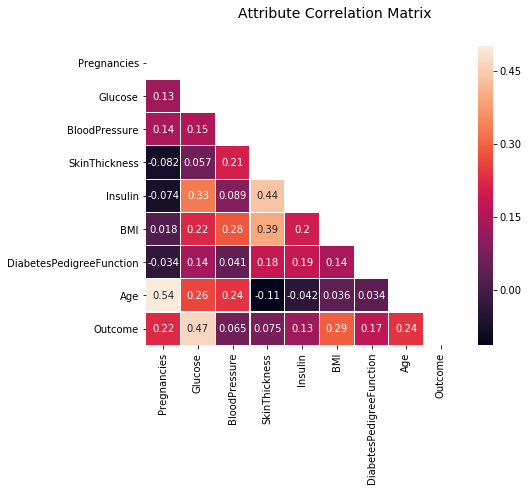

In [110]:
# calculate correlation
corr = data.corr()
#print(corr)
# plot correlation matrix
fig = plt.figure(figsize=(7, 5.5))
mask = np.zeros_like(corr, dtype=np.bool) # create mask to cover the upper triangle
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask, vmax=0.5,linewidths=0.1)
fig.suptitle('Attribute Correlation Matrix', fontsize=14)